<a href="https://colab.research.google.com/github/maggiesam/BEDU-DataScience/blob/main/Machine%20Learning/Equipo_4_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El impacto de la sequía en México - Machine Learning
## BEDU Disruptive Skills - Santander Universidades

### Equipo 4

María Magdalena Castro Sam

Sergio Napoleón Leal

Jesús Omar Magaña Medina

Adrián Ramírez Cortés

Efraín Soto Olmos


## Resumen

Este proyecto generó como producto final una red neuronal de tipo recurrente para generar un modelo tentativo que ayuda a proyectar el comportamiento promedio de la sequía. Esto es utilidad ya que la identificación temprana de este fenómeno puede ayudar a detonar acciones que permitan mitigar los estragos de la sequía, actuando como complemento del sistema de monitoreo de la CONAGUA.

## Introducción

La sequía es un fenómeno en el cual se presenta menos agua de la que hay normalmente. Por lo tanto puede presentarse de manera meteorológica (falta de lluvias) o hidrológica (falta de agua para servicios o potable) generando consecuencias tanto socioeconómicas como naturales, afectando a la población y los ecosistemas. 

En el presente proyecto se busca explorar los efectos de la sequía a través de técnicas de machine learning. Esto gracias a los proyectos previos que han permitido obtener información y análizar la información disponible.

La primera parte del proyecto consiste en una exploración que se hizo con el método de k-means y regresión lineal, la cual fue parte del primer entregable que se realizó en como parte del programa.

En la parte 2 se explora el método de forescasting para las variables de temperatura y precipitación con el método de random forest y finalmente se realiza una estimación climatológica de la sequía con ayuda de una red neuronal tipo LSTM.

Con este análisis se logró realizar un modelo tentativo que ayude a proyectar el comportamiento promedio de la sequía a 12 meses en el futuro, lo cual puede ser de gran utilizad, pues el tener el contar con sistemas de monitoreo y predicción temprana de la sequía puede ayudar a mitigar los estragos.

Este proyecto utilizó datasets previamente procesados. Se realizó una librería llamada MLUtilities.py con el fin de facilitar el uso de las librerías de machine leaning utilizadas. Adicionalmente se realizó una bitácora de experimentos que ayudó a mantener un registro de lo que se realizó.

La librería MLUtilities.py se puede ver [aquí](https://github.com/maggiesam/BEDU-DataScience/blob/main/MLUtilities.py).

La bitácora se puede ver [aquí](https://github.com/maggiesam/BEDU-DataScience/blob/main/Bitacora.md).

## Parte 1: K-means y regresión lineal

### Algoritmos no supervisados - KMeans

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Se utilizaron los datos del archivo dataframe-junto.csv guardado en nuestro [repositorio](https://github.com/maggiesam/BEDU-DataScience/blob/main/Datasets/dataframe-junto.csv), este data frame contiene todos los datos que hemos recopilado para este proyecto

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/Datasets/dataframe-junto.csv', index_col=0)
data.head()

,ENTIDAD,Mes,Año,Tipo_sequia,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,Sembrada_ha,Cosechada_ha,perdida_ha,producto
0,Aguascalientes,1,2005,NPS,0.0,12.699696,22.643727,2.755665,47286,43031,4255,maiz
1,Aguascalientes,1,2005,NPS,0.0,12.699696,22.643727,2.755665,11950,10570,1380,frijol
2,Aguascalientes,1,2006,D0,4.8,13.128922,24.114734,2.143109,39600,17684,21916,maiz
3,Aguascalientes,1,2006,D0,4.8,13.128922,24.114734,2.143109,10819,6602,4217,frijol
4,Aguascalientes,1,2007,NPS,17.2,13.320241,21.932079,4.860635,37727,31610,6117,maiz


Damos un vistazo a la estructura de nuestra dataframe

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12088 entries, 0 to 12087
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENTIDAD               12088 non-null  object 
 1   Mes                   12088 non-null  int64  
 2   Año                   12088 non-null  int64  
 3   Tipo_sequia           12088 non-null  object 
 4   Precipitacion         12088 non-null  float64
 5   Temperatura_promedio  12088 non-null  float64
 6   Temperatura_maxima    12088 non-null  float64
 7   Temperatura_minima    12088 non-null  float64
 8   Sembrada_ha           12088 non-null  int64  
 9   Cosechada_ha          12088 non-null  int64  
 10  perdida_ha            12088 non-null  int64  
 11  producto              12088 non-null  object 
dtypes: float64(4), int64(5), object(3)
memory usage: 1.2+ MB


Creamos una copia de nuestros datos

In [ ]:
df = data.copy() 

Reemplazamos los datos que contienen datos de tipo cadena por datos numericos

In [ ]:
mapping = {'NPS':-1, 'D0':0, 'D1':1, 'D2':2, 'D3':3, 'D4':4}
df['Tipo_sequia'] = df['Tipo_sequia'].map(mapping)

mapping = {'maiz':1, 'frijol':2, 'trigo':3}
df['producto'] = df['producto'].map(mapping)

Verificamos que los datos esten bien

In [ ]:
df.head()

,ENTIDAD,Mes,Año,Tipo_sequia,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,Sembrada_ha,Cosechada_ha,perdida_ha,producto
0,Aguascalientes,1,2005,-1,0.0,12.699696,22.643727,2.755665,47286,43031,4255,1
1,Aguascalientes,1,2005,-1,0.0,12.699696,22.643727,2.755665,11950,10570,1380,2
2,Aguascalientes,1,2006,0,4.8,13.128922,24.114734,2.143109,39600,17684,21916,1
3,Aguascalientes,1,2006,0,4.8,13.128922,24.114734,2.143109,10819,6602,4217,2
4,Aguascalientes,1,2007,-1,17.2,13.320241,21.932079,4.860635,37727,31610,6117,1


Escalamos nuestros para que no existan diferencias entre ellos

In [ ]:
std_scaler = StandardScaler()
data_cluster = df.iloc[:,3:]
data_cluster[data_cluster.columns] = std_scaler.fit_transform(data_cluster)

Verificamos el resultado

In [ ]:
data_cluster.head()

,Tipo_sequia,Precipitacion,Temperatura_promedio,Temperatura_maxima,Temperatura_minima,Sembrada_ha,Cosechada_ha,perdida_ha,producto
0,-0.628916,-0.820044,-1.830640,-1.446769,-2.010085,-0.054079,0.182410,-0.263735,-1.083748
1,-0.628916,-0.820044,-1.830640,-1.446769,-2.010085,-0.350458,-0.230729,-0.300224,0.247318
2,0.418959,-0.772973,-1.744545,-1.107579,-2.112740,-0.118545,-0.140187,-0.039584,-1.083748
3,0.418959,-0.772973,-1.744545,-1.107579,-2.112740,-0.359944,-0.281230,-0.264217,0.247318
4,-0.628916,-0.651373,-1.706169,-1.610863,-1.657325,-0.134254,0.037053,-0.240102,-1.083748


Reducimos a dos dimensiones nuestros data frame con originalmente 9 dimensiones

In [ ]:
pca_2 = PCA(2)
pca_2_resultados = pca_2.fit_transform(data_cluster)

Vemos cual es el valor de varianza acumulada

In [ ]:
print("Varianza acumulada explicada por mis dos nuevas variables: {:.2%}".format(np.sum(pca_2.explained_variance_ratio_)))

Varianza acumulada explicada por mis dos nuevas variables: 61.44%


Graficamos nuestros nuevos datos

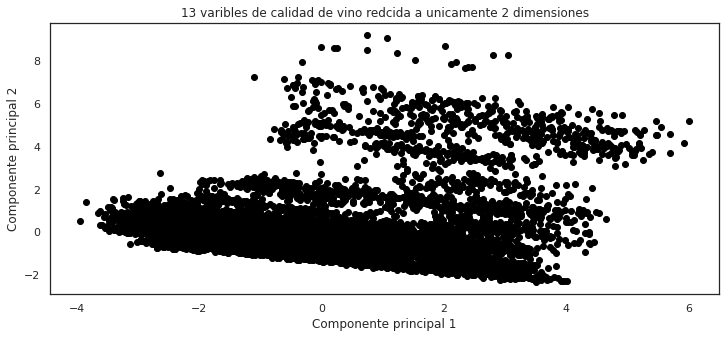

In [ ]:
sns.set(style="white", rc={"figure.figsize":(12,5)})

plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], color='black')
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("9 varibles de sequia reducida a unicamente 2 dimensiones")

plt.show()

Mediante un for hacemos pruebas con diferentes numero de cluster para el algoritmo K-means

In [ ]:
inertia = []
for i in range(1,10):
  kmeans = cluster.KMeans(n_clusters=i, init="k-means++", random_state=18)
  kmeans.fit(data_cluster)
  inertia.append(kmeans.inertia_)

De igual manera hacemos pruebas de diferente numero de cluster para K-means pero ahora usando el metodo de la silueta

In [ ]:
silhouette = {}
for i in range(2,10):
    kmeans = cluster.KMeans(n_clusters=i,init='k-means++', n_init=15, max_iter=500,random_state=18)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

Graficos los resultados del metodo del codo y silueta para elegir el valor optimo de k.
Como vemos el valor optimo para este caso es 4

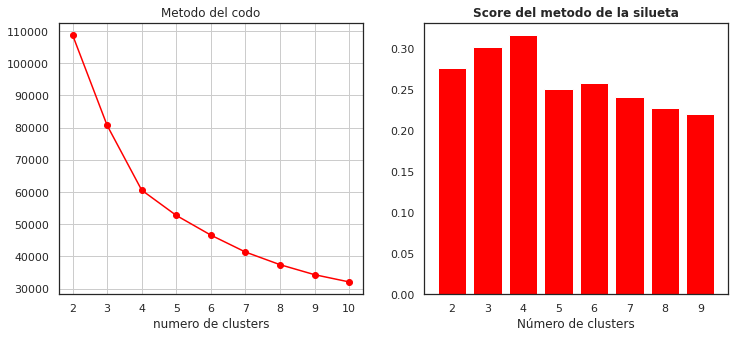

In [ ]:
# Vamos a graficar el metodo del codo y su complementario
sns.set(style="white", rc={"figure.figsize":(12,5)})
plt.subplot(1,2,1)

plt.plot(range(2,len(inertia)+2), inertia, marker="o", color ="red")
plt.xlabel("numero de clusters")
plt.title("Metodo del codo")
plt.grid(True)

plt.subplot(1,2,2)


plt.bar(range(len(silhouette)), list(silhouette.values()), align ="center", color ="red")
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.title("Score del metodo de la silueta", fontweight = "bold")
plt.xlabel("Número de clusters")

plt.show()
# Elegimos la barra mas grande en la silueta y el punto donde se separa poco en el metodo del codo
# en este caso el mejor numero de cluster es 3

Ya que tengamos el valor de k, usamos el algoritmo K-means con 4 cluster y lo alimentamos con los datos. De esta manera calculamos los centroides

In [ ]:
kmeans = cluster.KMeans(n_clusters=4, random_state=84, init="k-means++")
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroides_pca = pca_2.transform(centroids)

Graficamos nuestros datos y Centroides calculados por K-means

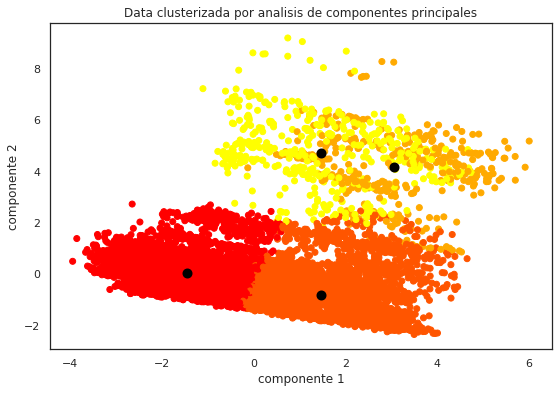

In [ ]:
sns.set(style="white", rc={"figure.figsize":(9,6)})

plt.scatter(x=pca_2_resultados[:,0], y=pca_2_resultados[:,1], c=kmeans_labels, cmap="autumn")
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker='o', color="black", linewidths=4, zorder=10)
plt.title("Data clusterizada por analisis de componentes principales")
plt.xlabel("componente 1")
plt.ylabel("componente 2")

plt.show()

### Regresión lineal

Buscamos poder predecir el porcentaje de siembra cosechado, utilizando las variables meteorológicas de temperatura y precipitación, así como la cantidad de hectáreas sembradas

Para eso cargamos el archivo MLUtilities.py como libreria de nuestro repositorio

In [ ]:
!wget "https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/MLUtilities.py"

--2021-10-17 22:27:03--  https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/MLUtilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6652 (6.5K) [text/plain]
Saving to: ‘MLUtilities.py’

MLUtilities.py      100%[===================>]   6.50K  --.-KB/s    in 0s      

2021-10-17 22:27:03 (60.8 MB/s) - ‘MLUtilities.py’ saved [6652/6652]



In [ ]:
import MLUtilities as mlu

El modelo se realiza para cada planta por separado, y los resultados de los experimentos expuestos en la bitácora, muestran que cada una tiene un modelo distinto. \\
Los modelos se separan por grados y ademas la opción de hacer el modelo por meses o todos los datos en conjunto.


Para el caso del maiz, se ve que el mejor modelo para la predicción es separar los datos por meses y utilizar una regresión de grado 2

In [ ]:
mlu.regresion_lineal(planta=0, grado=2, meses=True)

función de regresion polinomica de grado 2 de maiz
Entrenamiento: MSE =613.6261702756863
Pruebas: MSE =613.1658306750875


/content/MLUtilities.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto["porcentaje"] = producto["Cosechada_ha"]*100/producto["Sembrada_ha"]


,valor_real,prediccion
0,96.284784,86.514541
1,93.849796,61.488372
2,42.140983,63.063449
3,65.864263,53.798631
4,28.989172,76.077810
...,...,...
105,42.947461,66.659700
106,77.995529,69.473012
107,70.905707,79.647885
108,12.376238,63.607983


Para el caso del frijol, el mejor modelo para la predicción es el modelo sin separación por meses y de grado 2

In [ ]:
mlu.regresion_lineal(planta=1, grado=3, meses=False)

función de regresion polinomica de grado 3 de frijol
Entrenamiento: MSE =1054.3071924551366
Pruebas: MSE =1053.832373738116


/content/MLUtilities.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto["porcentaje"] = producto["Cosechada_ha"]*100/producto["Sembrada_ha"]


,valor_real,prediccion
0,99.716228,138.572357
1,39.293428,68.172325
2,99.693179,68.101161
3,6.930923,62.359138
4,72.380952,71.703757
...,...,...
965,0.486631,14.041122
966,24.224850,38.817552
967,47.104946,71.459087
968,100.000000,73.613714


Para el caso del trigo, el mejor modelo para la predicción es el modelo de grado 1 con separación por meses

In [ ]:
mlu.regresion_lineal(planta=2, grado=1, meses=True)

función de regresion lineal de trigo
Entrenamiento: MSE =557.434026049089
Pruebas: MSE =855.016977392184


/content/MLUtilities.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto["porcentaje"] = producto["Cosechada_ha"]*100/producto["Sembrada_ha"]


,valor_real,prediccion
0,5.725971,82.251943
1,90.693196,87.186435
2,100.000000,85.439683
3,24.429260,85.979821
4,23.586957,80.740415
5,100.000000,84.760120
6,100.000000,89.651367
7,79.865772,82.890734
8,100.000000,83.167977
9,100.000000,88.755305


A pesar de que los modelos si mejoran dadas ciertas circunstancias, siguen siendo muy malos para la predicción, en donde la mayoría predice erróneamente por mucho un valor bajo en el porcentaje de cosecha. \\
Ademas de que un análisis en conjunto seria muy difícil, ya que cada planta presenta un grado de regresión distinto, por lo que al menos con nuestra aproximación al problema, no se esperan resultados exitosos en la predicción por modelo lineal.


## Parte 2: Forecasting y estimación de la sequía por medio de redes neuronales

## Forecasting

En esta sección se hará uso de una función de la librería [skforecast](https://joaquinamatrodrigo.github.io/skforecast/), la cual permite utilizar los regresores de scikitlearn como algoritmos para el forecasting. \\
Solo se hará uso del regresor Random Forest.

### Utilities

Descarga de la librería del repositorio

In [ ]:
!wget -nc "https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/MLUtilities.py"

--2021-11-08 03:38:43--  https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/MLUtilities.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50946 (50K) [text/plain]
Saving to: ‘MLUtilities.py’

MLUtilities.py      100%[===================>]  49.75K  --.-KB/s    in 0.01s   

2021-11-08 03:38:43 (5.01 MB/s) - ‘MLUtilities.py’ saved [50946/50946]



In [ ]:
import MLUtilities as mlt
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Temperatura

Los datasets a analizar son de tipo línea temporal, por lo que se hará el uso del forecast para la predicción, utilizando regresores como herramienta de machine learning

###Carga de datos

Se cargan los datos desde el repositorio de GitHub

In [ ]:
data_tmp = pd.read_csv("https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/Datasets/Temperatura/temporal_temp.csv", index_col=[0])

Mediante la función en MLUtilities juntamos el año con el mes, le damos formato de fecha y lo colocamos como índice

In [ ]:
data_tmp = mlt.formato_linea(data_tmp)

###Análisis de linea temporal

Primero se realiza una exploración de la descomposición de la línea temporal a predecir

####Temperatura promedio

En este caso estaremos analizando la temperatura promedio de la entidad Aguascalientes

In [ ]:
data_aguascalientes =data_tmp[data_tmp["ENTIDAD"] == "AGUASCALIENTES"]

Exploración de la línea temporal

Mediante una librería muy utilizada en el ámbito de las lineas temporales y las regresiones, dividiremos las componentes de la linea temporal.
Se hace uso de la librería statsmodels, en especifico la función ***seasonal_decompose*** junto con la librería de representación gráfica matplotlib

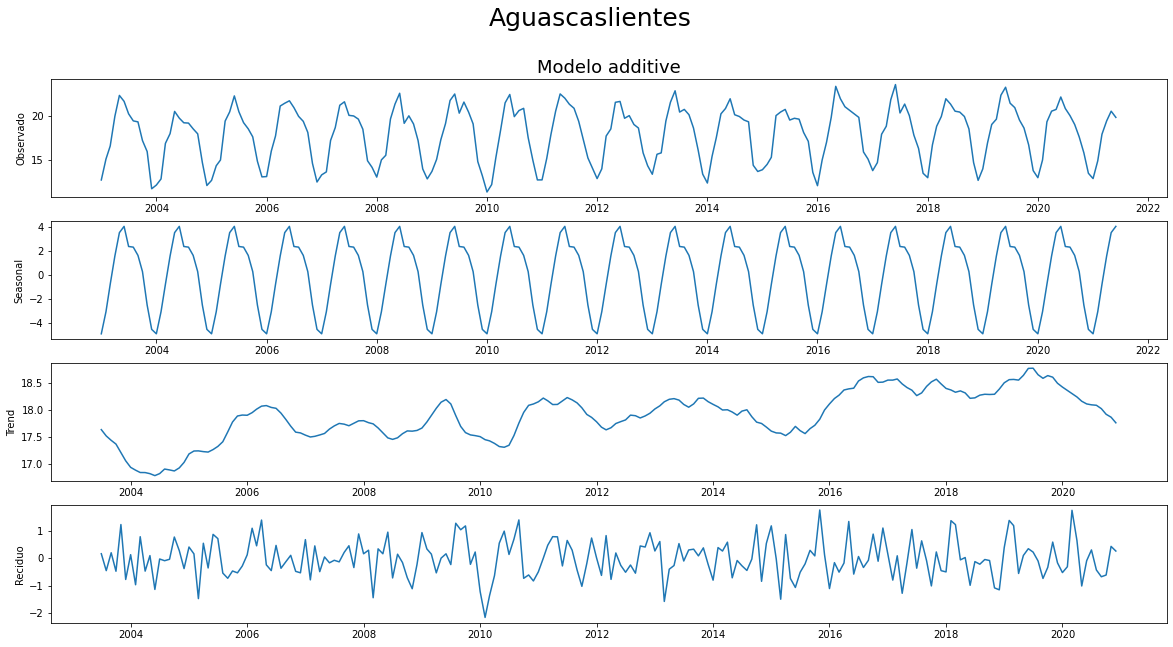

In [ ]:
mlt.descomposicion(data_aguascalientes["Temperatura_promedio"])

Separación de los datos

Una vez explorada la linea temporal, dividimos los datos para el entrenamiento y los datos para la prueba.

La función unicamente separa los datos segun el numero de meses que se quieren predecir, y devuelve los datos separados.

Ademas de dar una representación gráfica de los datos que se usaran

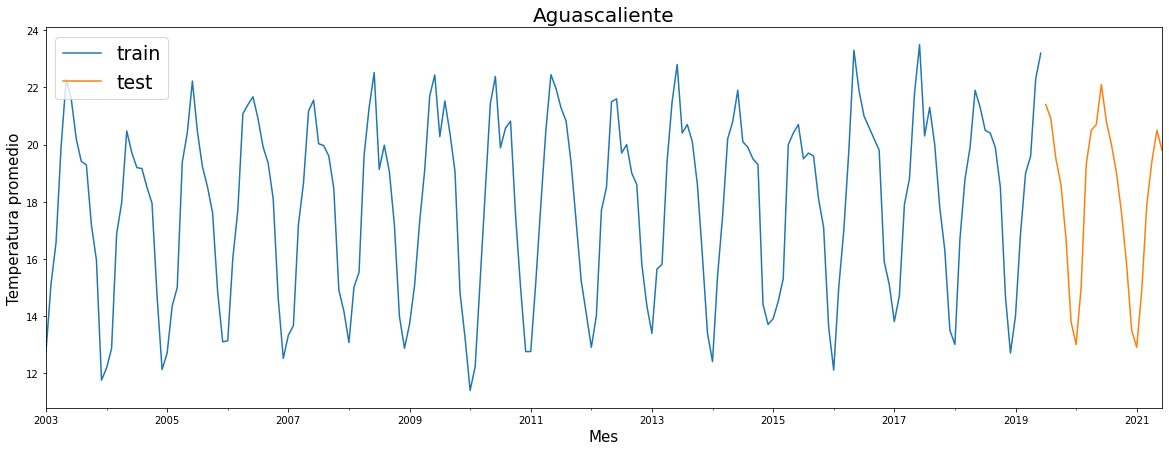

In [ ]:
datos_train,datos_test = mlt.visualizacion(data_aguascalientes["Temperatura_promedio"],
                                           24,
                                           name="Aguascaliente",
                                           dato="Temperatura promedio")

Predicción

Esta es la parte mas importante del análisis, la función contiene en su interior la función de transformación y predicción de los datos de skforecast.

Lo que hace especial a esta función, es el como se ordenan los datos, para poder hacer un entrenamiento de un modelo, mediante el método de regresión de machine learning.

Los datos se ordenan en forma de lags. Como una matriz en donde se tiene los datos de entrada como los pasos anteriores al paso que se quiere predecir, y este paso que se quiere predecir es el dato de salida.
Este proceso de repite hasta crear una matriz con los pasos dados uno por uno.

Una vez realizado este paso se entrena el regresor y se hace la predicción.

La función regresa el array de predicciones y el modelo entrenado.

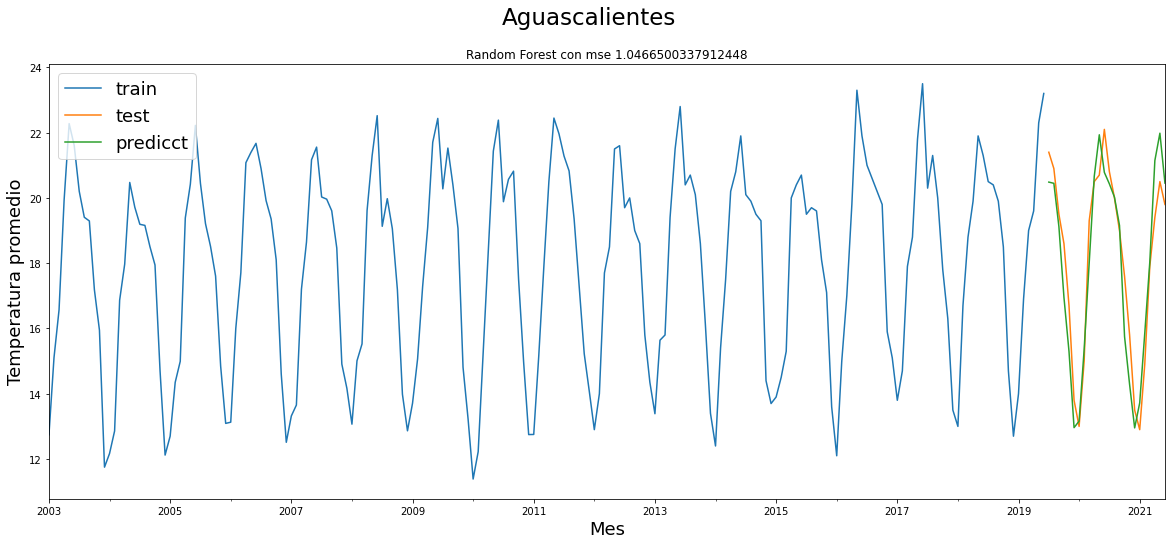

In [ ]:
predicciones_prom, modelo_prom = mlt.forecast(datos_train,
                                    datos_test,
                                    steps=24,
                                    forest=True,
                                    name="Aguascalientes",
                                    dato="Temperatura promedio")

Los análisis restantes por presentar siguen una metodología idéntica, la exploración de la línea temporal, la división de los datos de prueba, entrenamiento y predicción

####Temperatura mínima

Análisis de la línea temporal

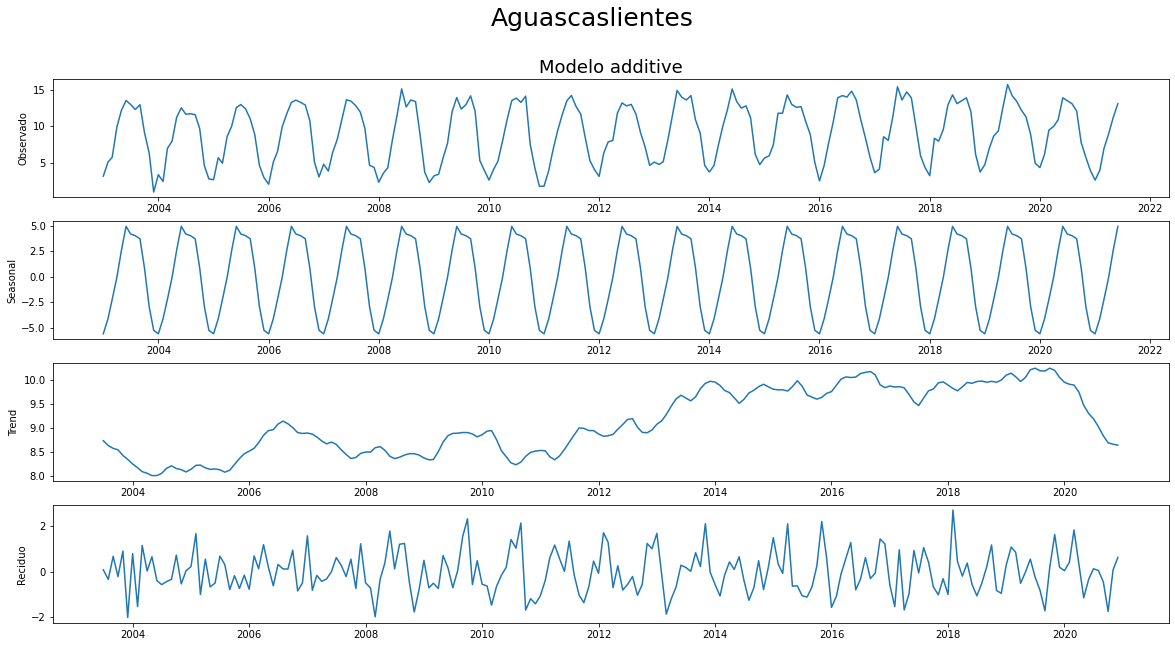

In [ ]:
mlt.descomposicion(data_aguascalientes["Temperatura_minima"])

Separación de los datos

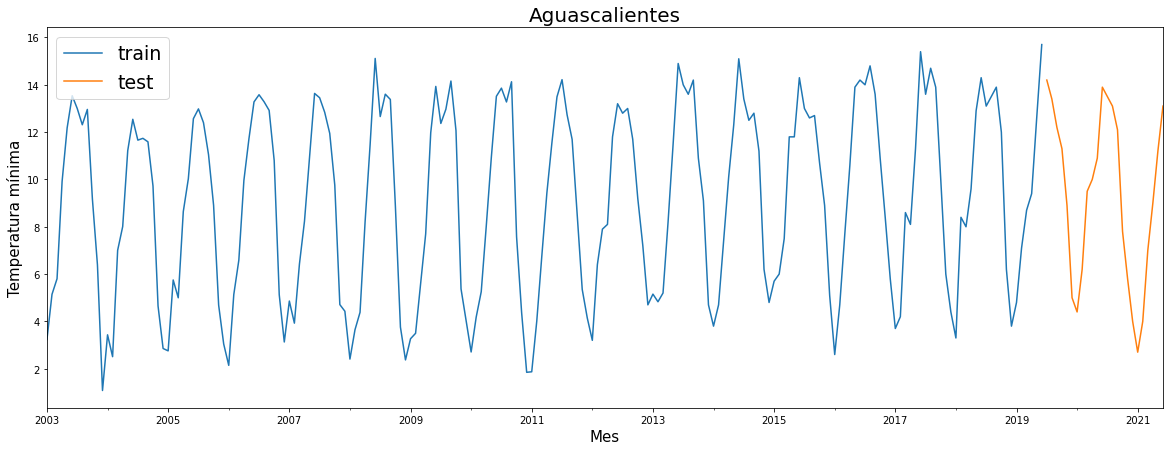

In [ ]:
train_mini,test_mini = mlt.visualizacion(data_aguascalientes["Temperatura_minima"],
                                           steps=24,
                                           name="Aguascalientes",
                                           dato="Temperatura mínima")

Predicción

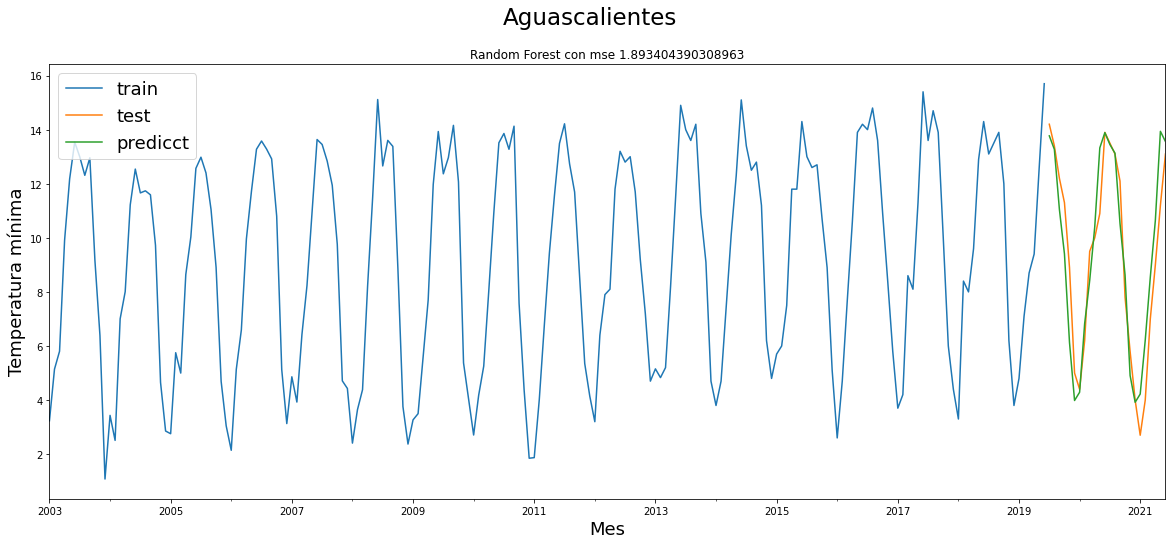

In [ ]:
prediccion_mini, modelo_mini = mlt.forecast(train_mini,
                          test_mini,
                          steps=24,
                          name="Aguascalientes",
                          dato="Temperatura mínima")

####Temperatura máxima

Análisis de la línea temporal

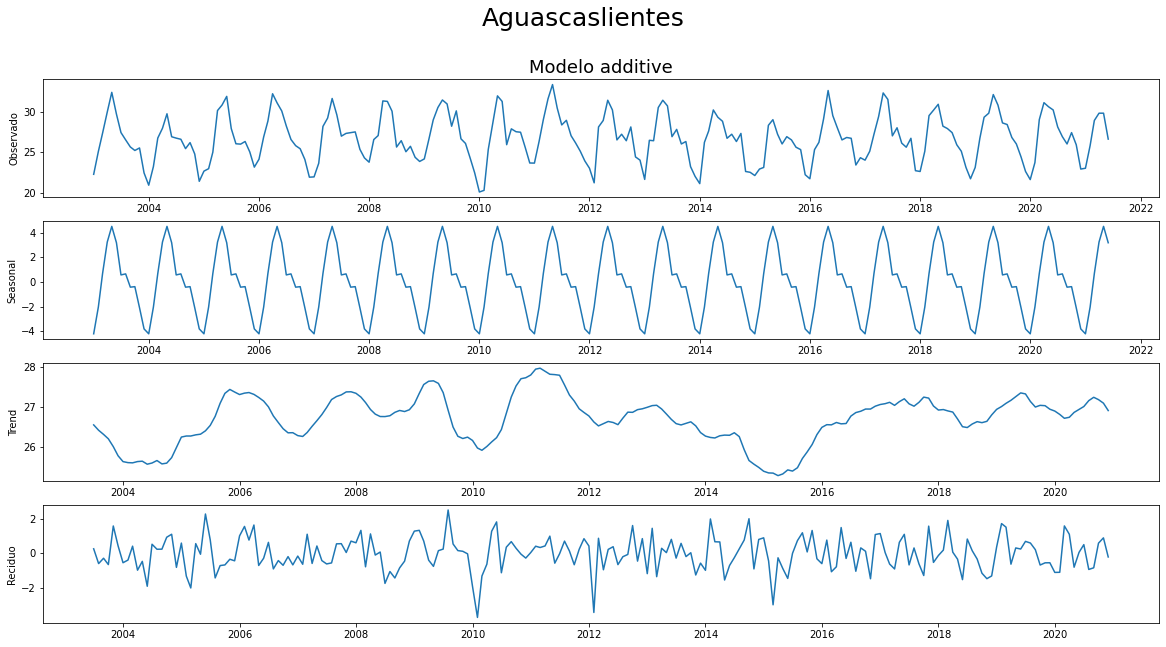

In [ ]:
mlt.descomposicion(data_aguascalientes["Temperatura_maxima"])

Separación de los datos

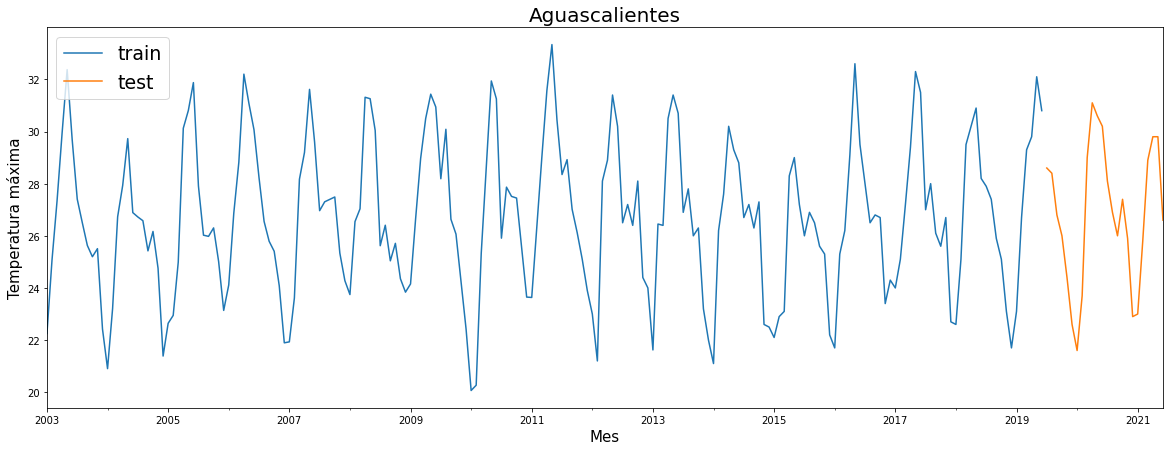

In [ ]:
train_max,test_max = mlt.visualizacion(data_aguascalientes["Temperatura_maxima"],
                                           steps=24,
                                           name="Aguascalientes",
                                           dato="Temperatura máxima")

Predicción

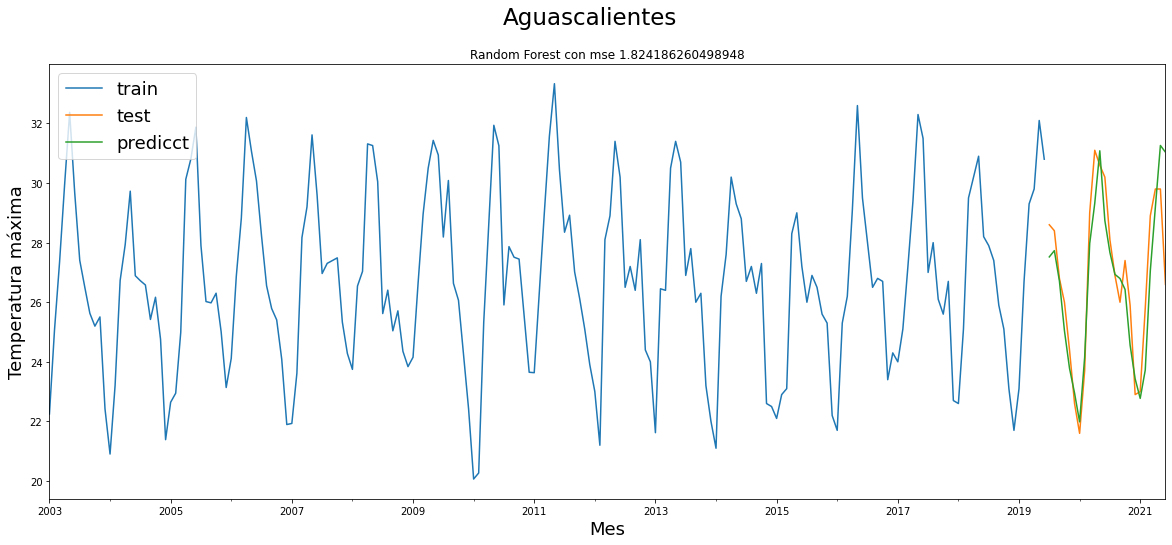

In [ ]:
prediccion_max, modelo_max = mlt.forecast(train_max,
                          test_max,
                          steps=24,
                          name="Aguascalientes",
                          dato="Temperatura máxima")

### Precipitacion

###Lectura de datos

In [ ]:
df_prec = pd.read_csv("https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/Datasets/Precipitacion/precipitacion.csv")

In [ ]:
df_prec = mlt.formato_linea(df_prec)

###Análisis temporal

In [ ]:
df_prec_aguas = df_prec[df_prec["ENTIDAD"] == "AGUASCALIENTES"]

Análisis de la línea temporal

En el análisis de la linea temporal vemos que la precipitación tiene un comportamiento extraño, pareciera cambiar significativamente

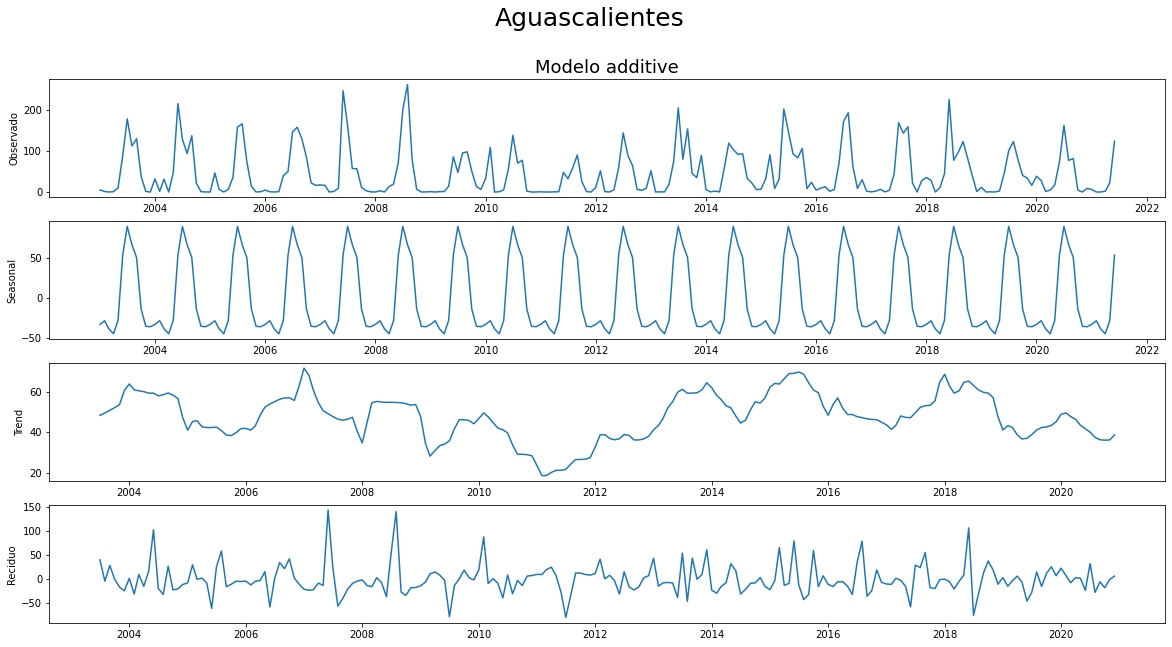

In [ ]:
mlt.descomposicion(df_prec_aguas["Precipitacion"],
                   name="Aguascalientes")

Separación de los datos

En cuanto a la división de los datos, se escogió la predicción a 1 año ya que esta es la que presenta el mejor rendimiento

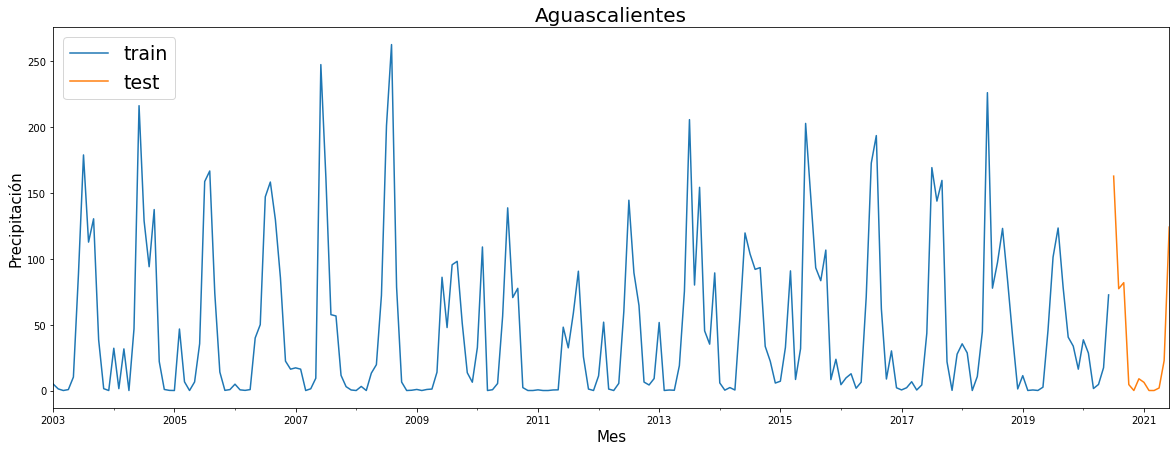

In [ ]:
train_prec,test_prec = mlt.visualizacion(df_prec_aguas["Precipitacion"],
                                           steps=12,
                                           name="Aguascalientes",
                                           dato="Precipitación")

Predicción

A pesar de que el modelo pareciera tener un comportamiento similar al observado, el error se muestra significativo para las dimensiones que se manejan

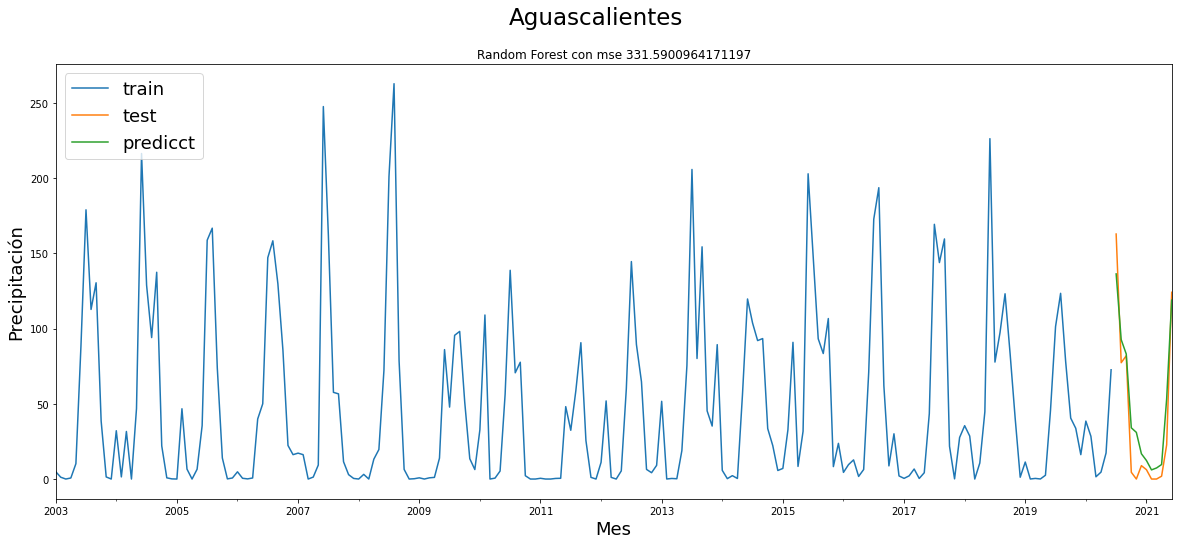

In [ ]:
prediccion_prec, modelo_prec = mlt.forecast(train_prec,
                          test_prec,
                          steps=12,
                          name="Aguascalientes",
                          dato="Precipitación")

### Cosechas

In [ ]:
frijol = pd.read_csv("https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/Datasets/siembra_cosecha/frijol_sembrado-cosechado_2004_2020.csv", index_col=[0])
maiz = pd.read_csv("https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/Datasets/siembra_cosecha/maiz_sembrado-cosechado_2004_2020.csv", index_col=[0])
trigo = pd.read_csv("https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/Datasets/siembra_cosecha/trigo_sembrado-cosechado_2004_2020.csv", index_col=[0])

In [ ]:
frijol = mlt.formato_linea(frijol)
maiz = mlt.formato_linea(maiz)
trigo = mlt.formato_linea(trigo)

In [ ]:
dic = {}
dic2 = {}
dic3 = {}
for i in frijol["Estado"].unique():
  dic[i] = frijol[frijol["Estado"] == i]["Estado"].count()
for i in maiz["Estado"].unique():
  dic2[i] = maiz[maiz["Estado"] == i]["Estado"].count()
for i in trigo["Estado"].unique():
  dic3[i] = trigo[trigo["Estado"] == i]["Estado"].count()

Con una simple exploración de los datos de las cosechas podemos observar que faltan muchísimos datos, lo que hace difícil el análisis y la predicción de la línea temporal

In [ ]:
dic

{'Aguascalientes': 71,
 'Baja california': 50,
 'Campeche': 184,
 'Chiapas': 272,
 'Chihuahua': 132,
 'Ciudad de mexico': 105,
 'Coahuila': 73,
 'Colima': 21,
 'Durango': 72,
 'Guanajuato': 83,
 'Guerrero': 228,
 'Hidalgo': 261,
 'Jalisco': 213,
 'Laguna coahuila': 20,
 'Laguna durango': 18,
 'Mexico': 94,
 'Michoacan': 154,
 'Morelos': 63,
 'Nayarit': 222,
 'Nuevo leon': 79,
 'Oaxaca': 242,
 'Puebla': 208,
 'Queretaro': 74,
 'Quintana roo': 225,
 'Region lagunera': 52,
 'San luis potosi': 238,
 'Sinaloa': 199,
 'Sonora': 141,
 'Tabasco': 202,
 'Tamaulipas': 206,
 'Tlaxcala': 80,
 'Total': 301,
 'Veracruz': 294,
 'Yucatan': 195,
 'Zacatecas': 77}

### SPI

###Carga de datos

In [ ]:
df_spi = pd.read_csv("https://raw.githubusercontent.com/EfrainSO/ejemplo_1/main/spi.csv", index_col=[0])

In [ ]:
df_spi = df_spi[df_spi["Año"] >= 2003]
df_spi["Mes"] = df_spi.loc[:, "Mes"].astype(int)
df_spi = mlt.formato_linea(df_spi)

numexpr.utils INFO  NumExpr defaulting to 2 threads.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/MLUtilities.py:1215: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/MLUtilities.py:1216: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [ ]:
spi_aguascaliente = df_spi[df_spi["Estado"] == "Campeche"]

###Visualizacion de la linea temporal

Podemos observar que entre las lineas temporales vistas hasta ahora, esta es la que presenta un comportamiento mas aleatorio

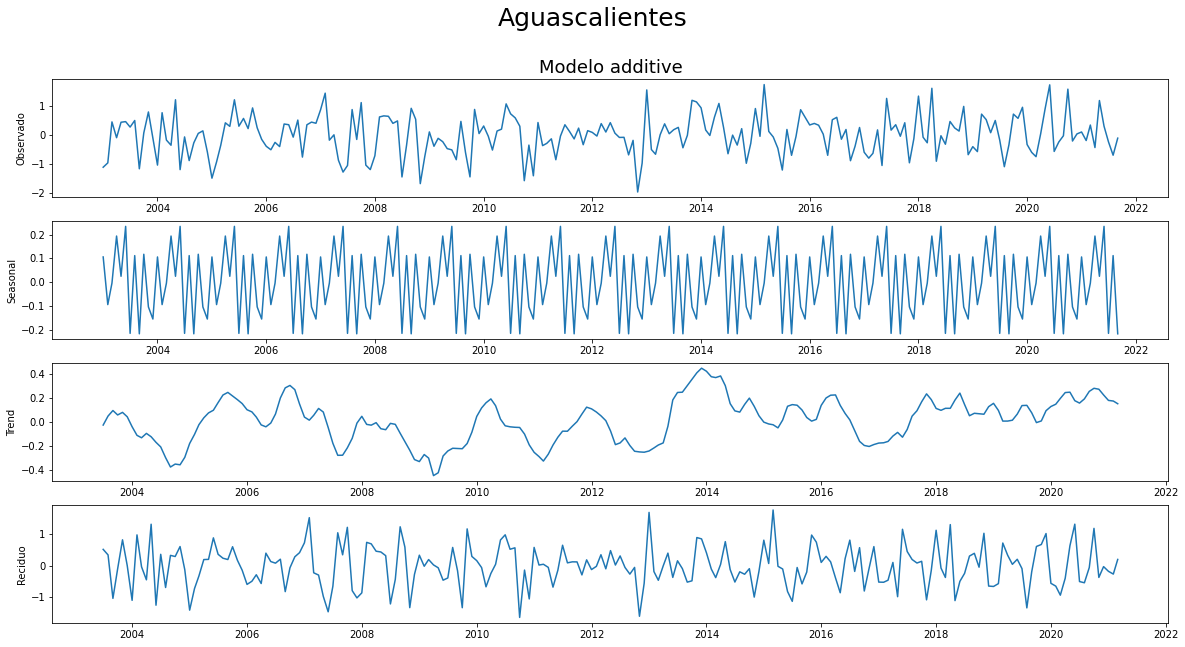

In [ ]:
mlt.descomposicion(spi_aguascaliente["SPI"],
                   name="Aguascalientes")

###Modelado

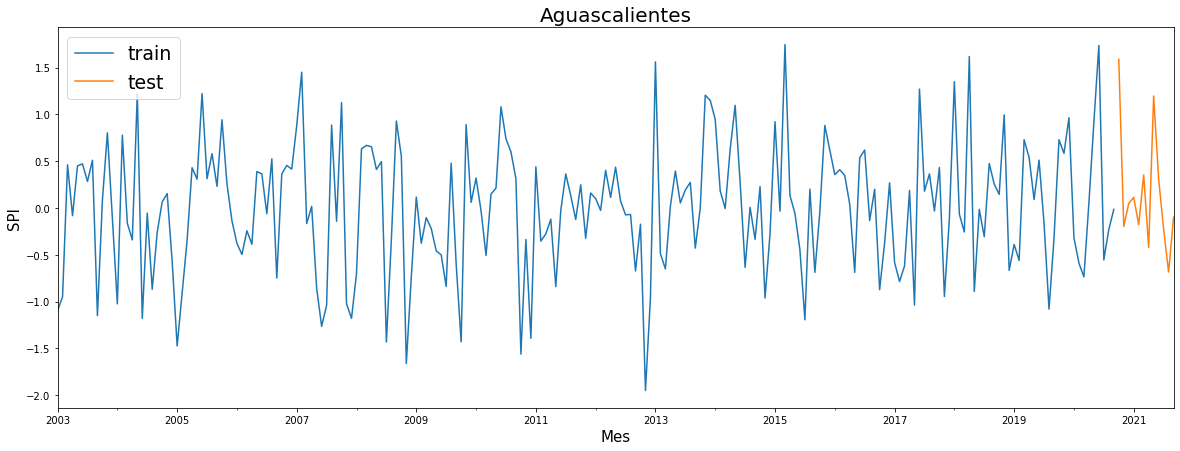

In [ ]:
train_spi,test_spi = mlt.visualizacion(spi_aguascaliente["SPI"],
                                           steps=12,
                                           name="Aguascalientes",
                                           dato="SPI")

A simple vista el forecasting utilizando regresores de sciklearn es poco efectivo para este caso, puede deberse al comportamiento aleatorio de los datos


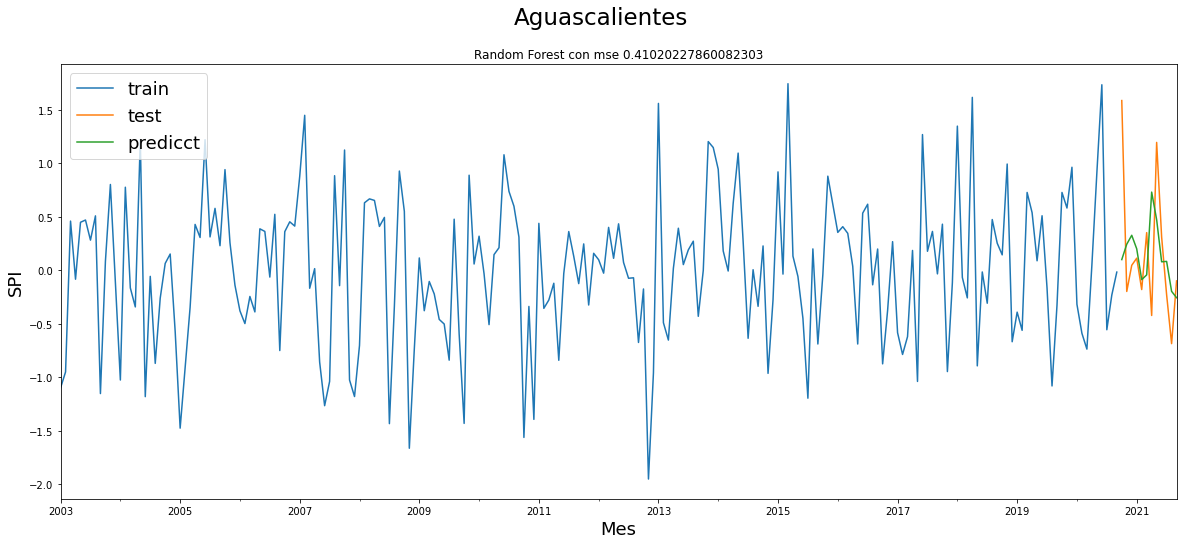

In [ ]:
prediccion_spi, modelo_spi = mlt.forecast(train_spi,
                                  test_spi,
                                  steps=12,
                                  name="Aguascalientes",
                                  dato="SPI")

### Conclusión

Muchos factores influyen en la sequia, aunque principalmente se debe a la falta de lluvias, podemos observar que el comportamiento de las lluvias a cambiado a lo largo de los años. Por lo que es evidente los problemas que se enfrentan, esto añadiendo el crecimiento poblacional. 

Pero a pesar de eso es posible hacer una predicción de algunos factores ambientales claves, como se presenta en este trabajo, es posible la predicción de la precipitación, con buena precisión para 12 meses con la información recabada y la ayuda del machine learning

## Red Neuronal Recurrente - LSTM

El Índice Estandarizado de Precipitación o más conocido por sus siglas en inglés SPI, es uno de los índices mas utilizados para evaluar la sequía de un lugar. Actualmente el Monitor de Sequía en México(MSM) de la CONAGUA usa este índice para clasificar el tipo de sequía por municipio y estado. Nos interesa predecir este índice, afortunadamente la CONAGUA ofrece al público estos datos por cada estación que tiene establecidos la CONAGUA en cada estado.

Por ello se optó por usar una **red neuronal recurrente (RNN) de tipo LSTM**, ya que estaríamos usando series de tiempo y este tipo de redes neuronales han dado buenos resultados en estos casos.

### Importación de bibliotecas

In [ ]:
import pandas as pd
import numpy as np

import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

import plotly.graph_objects as go
import plotly.express as px

### Carga y exploración de datos

Los datos son cargamos desde nuestro [repositorio](https://github.com/maggiesam/BEDU-DataScience), estos datos ya estan preprocesados y fueron extraidos de la pagina de la [CONAGUA](https://smn.conagua.gob.mx/es/climatologia/monitor-de-sequia/spi).

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/maggiesam/BEDU-DataScience/main/Datasets/SPI/Spi.csv', index_col=0)

Como podemos observar nuestro dataset esta conformado por 4 columnas.

In [ ]:
df.head()

,Date,Estado,Municipio,SPI
0,1951-01-01,Aguascalientes,Jaltomate,-2.0
1,1951-02-01,Aguascalientes,Jaltomate,-2.0
2,1951-03-01,Aguascalientes,Jaltomate,-2.0
3,1951-04-01,Aguascalientes,Jaltomate,-2.0
4,1951-05-01,Aguascalientes,Jaltomate,-2.0


In [ ]:
df.describe()

,SPI
count,350637.000000
mean,-0.235143
std,1.159817
min,-5.610000
25%,-1.040000
50%,-0.100000
75%,0.580000
max,5.170000


A continuación, observamos un ejemplo de cómo se comportaría el valor de SPI de San Pedro Quiatoni en Oaxaca, podemos notar que en ocasiones hay picos tanto para arriba como para abajo, estos picos son valores atípicos que pudieran confundir a nuestro modelo más adelante sin embargo son datos importantes que no podemos eliminar.

In [ ]:
df_oaxaca = df.query('Estado == "Oaxaca" and Municipio == "San Pedro Quiatoni"')

fig = px.line(df_oaxaca, x='Date', y="SPI", title="San Pedro Quiatoni, Oaxaca")
fig.show()

### Entrenamiento, prueba y prediccion de SPI

Entrenar el modelo con todos los datos al mismo tiempo destruiría la serie de tiempo que se forma con ellos, por ende, se decidió construir una red neuronal por cada municipio relevante.

Se definen tres funciones que utilizarán para entrenar, probar y graficar la red neuronal, además de predecir el valor de SPI 12 meses en el futuro.

La funcion red_neuronal se encarga de construir la red neuronal, recibe como parametro el estado y municipio que se desea construir un modelo.

In [ ]:
def red_neuronal(estado, municipio):
  # Selección de los datos del estado y municipio elegido
  filtro = (df['Estado'] == estado) & (df['Municipio'] == municipio)
  df_filter = df[filtro]

  # Redimensionamos los datos
  close_data = df_filter['SPI'].values
  close_data = close_data.reshape((-1,1))

  # Dividimos nuestros datos en datos de prueba y entrenamiento
  split_percent = 0.80
  split = int(split_percent*len(close_data))
  close_train = close_data[:split]
  close_test = close_data[split:]

  # Seleccionamos las fechas de los datos de entrenamiento y prueba
  date_train = df_filter['Date'][:split]
  date_test = df_filter['Date'][split:]

  # Se elige que se base en los 12 meses anteriores para predecir 
  look_back = 12

  # Transformamos los datos a característica y etiqueta
  train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
  test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

  # Construimos la red neuronal
  model = Sequential()
  model.add(
      LSTM(8,
          activation='relu',
          input_shape=(look_back,1))
  )
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')

  # Entrenamos la red neuronal
  model.fit(train_generator, epochs=700, verbose=1)

  # Hacemos una prediccion
  prediction = model.predict(test_generator)

  # Redimensionamos los datos
  close_train = close_train.reshape((-1))
  close_test = close_test.reshape((-1))
  prediction = prediction.reshape((-1))

  # Imprimimos el MSE
  print("Mean Squared Error: ", mean_squared_error(close_test[:len(prediction)], prediction))

  # Hacemos una prediccion de 12 meses en el futuro  
  num_prediction = 12
  forecast = predict(num_prediction, model, close_data, look_back)
  forecast_dates = predict_dates(num_prediction, df_filter)

  # Graficamos la red neuronal
  graficar_datos(date_train, date_test, close_train, close_test, prediction, estado + ', ' + municipio, forecast_dates,forecast)

Estas dos funciones predicen 12 meses en el futuro el valor del SPI ademas de las fechas que se van a predecir

In [ ]:
def predict(num_prediction, model, data, look_back):
  data = data.reshape((-1))
  prediction_list = data[-look_back:]
    
  for _ in range(num_prediction):
    x = prediction_list[-look_back:]
    x = x.reshape((1, look_back, 1))
    out = model.predict(x)[0][0]
    prediction_list = np.append(prediction_list, out)
  prediction_list = prediction_list[look_back-1:]
        
  return prediction_list
    
def predict_dates(num_prediction,dates):
  last_date = dates['Date'].values[-1]
  prediction_dates = pd.date_range(last_date, periods=num_prediction+1, freq='M').tolist()
  return prediction_dates

Esta funcion grafica los datos reales, los datos de entrenamiento y la prediccion

In [ ]:
def graficar_datos(date_train, date_test, close_train, close_test, prediction, nombre,forecast_dates,forecast):
  trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
  )
  trace2 = go.Scatter(
      x = date_test,
      y = prediction,
      mode = 'lines',
      name = 'Prediction'
  )
  trace3 = go.Scatter(
      x = date_test,
      y = close_test,
      mode='lines',
      name = 'Ground Truth'
  )
  trace4 = go.Scatter(
    x = forecast_dates,
    y = forecast,
    mode = 'lines',
    name = 'Prediction Future'
)
  layout = go.Layout(
      title = "Drought Prediction of " + nombre,
      xaxis = {'title' : "Date"},
      yaxis = {'title' : "SPI"}
  )
  fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
  fig.show() 

Como vemos el modelo se esta adaptando al comportamiento de la sequía

In [ ]:
red_neuronal("Baja California", "San Felipe")

Epoch 1/700
34/34 [==============================] - 3s 39ms/step - loss: 1.2755
Epoch 2/700
34/34 [==============================] - 1s 39ms/step - loss: 1.0823
Epoch 3/700
34/34 [==============================] - 1s 39ms/step - loss: 0.9087
Epoch 4/700
34/34 [==============================] - 1s 39ms/step - loss: 0.7798
Epoch 5/700
34/34 [==============================] - 1s 39ms/step - loss: 0.7401
Epoch 6/700
34/34 [==============================] - 1s 37ms/step - loss: 0.7310
Epoch 7/700
34/34 [==============================] - 1s 39ms/step - loss: 0.7248
Epoch 8/700
34/34 [==============================] - 1s 39ms/step - loss: 0.7197
Epoch 9/700
34/34 [==============================] - 1s 38ms/step - loss: 0.7166
Epoch 10/700
34/34 [==============================] - 1s 39ms/step - loss: 0.7129
Epoch 11/700
34/34 [==============================] - 1s 39ms/step - loss: 0.7090
Epoch 12/700
34/34 [==============================] - 1s 38ms/step - loss: 0.7077
Epoch 13/700
34/34 [=====

In [ ]:
red_neuronal("Oaxaca", "San Pedro Quiatoni")

Epoch 1/700
34/34 [==============================] - 2s 32ms/step - loss: 0.8792
Epoch 2/700
34/34 [==============================] - 1s 31ms/step - loss: 0.8286
Epoch 3/700
34/34 [==============================] - 1s 32ms/step - loss: 0.8092
Epoch 4/700
34/34 [==============================] - 1s 31ms/step - loss: 0.7961
Epoch 5/700
34/34 [==============================] - 1s 31ms/step - loss: 0.7810
Epoch 6/700
34/34 [==============================] - 1s 31ms/step - loss: 0.7652
Epoch 7/700
34/34 [==============================] - 1s 30ms/step - loss: 0.7523
Epoch 8/700
34/34 [==============================] - 1s 32ms/step - loss: 0.7410
Epoch 9/700
34/34 [==============================] - 1s 32ms/step - loss: 0.7293
Epoch 10/700
34/34 [==============================] - 1s 32ms/step - loss: 0.7228
Epoch 11/700
34/34 [==============================] - 1s 32ms/step - loss: 0.7207
Epoch 12/700
34/34 [==============================] - 1s 30ms/step - loss: 0.7172
Epoch 13/700
34/34 [=====

In [ ]:
red_neuronal("Guerrero", "Tlacotepec")

Epoch 1/700
34/34 [==============================] - 2s 33ms/step - loss: 1.1663
Epoch 2/700
34/34 [==============================] - 1s 31ms/step - loss: 1.0712
Epoch 3/700
34/34 [==============================] - 1s 32ms/step - loss: 0.9974
Epoch 4/700
34/34 [==============================] - 1s 33ms/step - loss: 0.9401
Epoch 5/700
34/34 [==============================] - 1s 30ms/step - loss: 0.8795
Epoch 6/700
34/34 [==============================] - 1s 30ms/step - loss: 0.8256
Epoch 7/700
34/34 [==============================] - 1s 32ms/step - loss: 0.7798
Epoch 8/700
34/34 [==============================] - 1s 33ms/step - loss: 0.7124
Epoch 9/700
34/34 [==============================] - 1s 32ms/step - loss: 0.6837
Epoch 10/700
34/34 [==============================] - 1s 34ms/step - loss: 0.6759
Epoch 11/700
34/34 [==============================] - 1s 34ms/step - loss: 0.6546
Epoch 12/700
34/34 [==============================] - 1s 31ms/step - loss: 0.6368
Epoch 13/700
34/34 [=====

In [ ]:
red_neuronal("Puebla", "Axutla")

Epoch 1/700
34/34 [==============================] - 3s 33ms/step - loss: 1.0970
Epoch 2/700
34/34 [==============================] - 1s 30ms/step - loss: 1.0386
Epoch 3/700
34/34 [==============================] - 1s 32ms/step - loss: 1.0020
Epoch 4/700
34/34 [==============================] - 1s 34ms/step - loss: 0.9745
Epoch 5/700
34/34 [==============================] - 1s 32ms/step - loss: 0.9504
Epoch 6/700
34/34 [==============================] - 1s 33ms/step - loss: 0.9267
Epoch 7/700
34/34 [==============================] - 1s 31ms/step - loss: 0.9112
Epoch 8/700
34/34 [==============================] - 1s 34ms/step - loss: 0.8892
Epoch 9/700
34/34 [==============================] - 1s 30ms/step - loss: 0.8768
Epoch 10/700
34/34 [==============================] - 1s 32ms/step - loss: 0.8696
Epoch 11/700
34/34 [==============================] - 1s 33ms/step - loss: 0.8665
Epoch 12/700
34/34 [==============================] - 1s 33ms/step - loss: 0.8663
Epoch 13/700
34/34 [=====

## Conclusión

El presente proyecto buscó utilizar diversos algoritmos con los cuales poder realizar un análisis de la sequía a través de distintos alrgoritmos, en este caso, Random Forest y una Red Neuronal Recurrente.

Las proyecciones hechas con el forecasting muestran un cambio a través de los años en la temperatura y precipitación, lo cual es consistente con la complejidad que tienen las variables climatológicas, en  donde múltiples factores influyen en el clima.

Con la red neuronal fue posible realizar que muestre un promedio de como se comportará la sequía. En cuestiones técnicas el modelo 
llega a tener el error cuadrático medio más bajo de 0.24 y un tiempo medio de ejecución de 3 minutos. 

La predicción puede ser utilizada de manera tentativa para ayudar a conocer el comportamiento de la sequía. La proyección de este comportamiento puede ayudar para detonar acciones de forma local, estatal y nacional que ayuden a mitigar los efectos de la sequía de forma que tanto la población pueda tener acceso al agua como los hábitats naturales se encuentren más protegidos ante este fenómeno natural.

Como trabajo futuro se sugiren los siguientes pasos:

- Un análisis más a fondo de los diferentes estados, separado por regiones geográficas (en concreto hidrológicas).

- Incluir otras variables que influyen en este proceso tales como la circulación océanica y atmosférica, la humedad del suelo y topografía de acuerdo a la zona.

- Más poder computacional ayudará a generar predicciones más precisas.

